# Задача


В этом проекте вы будете работать над прогнозированием оттока. Вам нужно будет предсказать, какие клиенты перестанут быть клиентами банка. Вам нужно будет использовать многослойный персептрон для вашего окончательного прогноза.
- Базовый. Наивный классификатор, в котором для прогнозов используется самый популярный класс.
- Случайный лес. Решите задачу, используя случайный лес в качестве другого базового решения, используйте поиск по сетке для поиска оптимальных гиперпараметро- в.
- Scikit-learn. Решите задачу с помощью MLPClassifier .
- Keras. Решить задачу с помощью Keras из библиотеки TensorFlow.
- TensorFlow. Решите задачу с помощью библиотеки TensorFlow.
- NumPy. Реализуйте лучшую архитектуру, которую вы достигли ранее, но с NumPy, используя матричные вычисления. Вам нужно обучить модель и использовать ее для вывода (предсказаний).

# Импорт необходимых библиотек

In [1]:
import zipfile # Библиотека для работы с zip архивами
import os      # Библиотека для работы с фаловой системой
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Подгрузка и подготовка данных

In [ ]:
# Разархивируем папку с данными

# Прописываем путь к файлу с архивом
zip_file = '../datasets/p01_bank_data.zip'


# Распаковываем архив
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

# Просмотр результата разархивации
print(os.listdir())

['.config', 'drive', 'bank_data_test.csv', 'bank_data_train.csv', 'sample_data']


In [3]:
df_train = pd.read_csv('bank_data_train.csv')
# df_train = pd.read_csv('/content/drive/MyDrive/DS.Project_02-1/src/bank_data_train.csv')

df_train

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,590822,0,0.000000,0.0,NaN,0.0,0.0,0.0,0.142857,0.123579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
355186,590823,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355187,590825,0,0.041298,NaN,NaN,NaN,NaN,0.0,0.089286,0.065293,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355188,590826,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [4]:
df_test = pd.read_csv('bank_data_test.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/DS.Project_02-1/src/bank_data_test.csv')
df_test

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,400980,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,525062,0,0.059381,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,NaN
2,280316,0,0.070430,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,496066,0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,375031,0,0.180961,0.0,77.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88793,175305,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
88794,275016,1,1.000000,0.0,63.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
88795,277398,0,0.047768,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
88796,469164,0,0.035166,NaN,NaN,NaN,NaN,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Посмотрим сумму пропусков  и сколько значений == 0 в каждом столбце тренировочного датасета

In [5]:
table = pd.DataFrame(columns=['col_name', 'null_perc', 'zero_perc', 'null_zero'])
len_df = len(df_train)
column_names = df_train.columns.tolist()
for name in column_names:
  null_perc = round(df_train[name].isna().sum() / len_df, 2)
  zero_perc = round(len(df_train[df_train[name]==0.0]) / len_df, 2)
  null_zero = zero_perc + null_perc
  table.loc[len(table.index)] = [name, null_perc, zero_perc, null_zero]

table

,col_name,null_perc,zero_perc,null_zero
0,ID,0.00,0.00,0.00
1,CR_PROD_CNT_IL,0.00,0.92,0.92
2,AMOUNT_RUB_CLO_PRC,0.11,0.46,0.57
3,PRC_ACCEPTS_A_EMAIL_LINK,0.56,0.44,1.00
4,APP_REGISTR_RGN_CODE,0.83,0.00,0.83
...,...,...,...,...
111,TURNOVER_DYNAMIC_CC_3M,0.00,0.99,0.99
112,LDEAL_ACT_DAYS_PCT_TR,0.74,0.25,0.99
113,LDEAL_ACT_DAYS_PCT_TR4,0.74,0.25,0.99
114,LDEAL_ACT_DAYS_PCT_CURR,0.74,0.25,0.99


Получим список названий столбцов где количество пропусков + значений равных 0.0 < 50%. Не забудем оставить столбец `TARGET`

In [6]:
table = table.loc[(table['null_zero'] < 0.95) & (table['null_perc'] < 0.40)]
table

,col_name,null_perc,zero_perc,null_zero
0,ID,0.00,0.00,0.00
1,CR_PROD_CNT_IL,0.00,0.92,0.92
2,AMOUNT_RUB_CLO_PRC,0.11,0.46,0.57
10,AMOUNT_RUB_SUP_PRC,0.11,0.26,0.37
20,REST_DYNAMIC_SAVE_3M,0.00,0.87,0.87
22,REST_AVG_CUR,0.00,0.12,0.12
26,AMOUNT_RUB_NAS_PRC,0.11,0.46,0.57
29,TRANS_COUNT_SUP_PRC,0.11,0.26,0.37
35,TRANS_COUNT_NAS_PRC,0.11,0.46,0.57
38,CR_PROD_CNT_TOVR,0.00,0.74,0.74


In [7]:
col_list = table['col_name'].to_list()
# col_list.append('TARGET')
col_list

['ID',
 'CR_PROD_CNT_IL',
 'AMOUNT_RUB_CLO_PRC',
 'AMOUNT_RUB_SUP_PRC',
 'REST_DYNAMIC_SAVE_3M',
 'REST_AVG_CUR',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'TRANS_COUNT_NAS_PRC',
 'CR_PROD_CNT_TOVR',
 'TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC',
 'TURNOVER_PAYM',
 'AGE',
 'CR_PROD_CNT_CC',
 'REST_DYNAMIC_CUR_1M',
 'REST_AVG_PAYM',
 'REST_DYNAMIC_CUR_3M',
 'TURNOVER_DYNAMIC_CUR_1M',
 'REST_DYNAMIC_PAYM_3M',
 'CNT_TRAN_ATM_TENDENCY3M',
 'SUM_TRAN_ATM_TENDENCY3M',
 'REST_DYNAMIC_PAYM_1M',
 'TURNOVER_DYNAMIC_CUR_3M',
 'PACK',
 'CLNT_SETUP_TENOR',
 'TURNOVER_DYNAMIC_PAYM_3M',
 'TURNOVER_DYNAMIC_PAYM_1M',
 'TRANS_AMOUNT_TENDENCY3M',
 'TRANS_CNT_TENDENCY3M',
 'TARGET']

В датафреймах трейн и тест оставим только эти столбцы

In [8]:
train_new = df_train[col_list]
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        355190 non-null  int64  
 1   CR_PROD_CNT_IL            355190 non-null  int64  
 2   AMOUNT_RUB_CLO_PRC        316867 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        316867 non-null  float64
 4   REST_DYNAMIC_SAVE_3M      355190 non-null  float64
 5   REST_AVG_CUR              355190 non-null  float64
 6   AMOUNT_RUB_NAS_PRC        316867 non-null  float64
 7   TRANS_COUNT_SUP_PRC       316867 non-null  float64
 8   TRANS_COUNT_NAS_PRC       316867 non-null  float64
 9   CR_PROD_CNT_TOVR          355190 non-null  int64  
 10  TRANS_COUNT_ATM_PRC       316867 non-null  float64
 11  AMOUNT_RUB_ATM_PRC        316867 non-null  float64
 12  TURNOVER_PAYM             355190 non-null  float64
 13  AGE                       355190 non-null  i

In [9]:
test_new = df_test[col_list[:-1]]
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88798 entries, 0 to 88797
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        88798 non-null  int64  
 1   CR_PROD_CNT_IL            88798 non-null  int64  
 2   AMOUNT_RUB_CLO_PRC        79198 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        79198 non-null  float64
 4   REST_DYNAMIC_SAVE_3M      88798 non-null  float64
 5   REST_AVG_CUR              88798 non-null  float64
 6   AMOUNT_RUB_NAS_PRC        79198 non-null  float64
 7   TRANS_COUNT_SUP_PRC       79198 non-null  float64
 8   TRANS_COUNT_NAS_PRC       79198 non-null  float64
 9   CR_PROD_CNT_TOVR          88798 non-null  int64  
 10  TRANS_COUNT_ATM_PRC       79198 non-null  float64
 11  AMOUNT_RUB_ATM_PRC        79198 non-null  float64
 12  TURNOVER_PAYM             88798 non-null  float64
 13  AGE                       88798 non-null  int64  
 14  CR_PRO

Заполним пропуски медианным значением

In [10]:
temp = train_new.isna().sum()
have_null = temp[temp > 0].index.to_list()
have_null

['AMOUNT_RUB_CLO_PRC',
 'AMOUNT_RUB_SUP_PRC',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'TRANS_COUNT_NAS_PRC',
 'TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC',
 'CNT_TRAN_ATM_TENDENCY3M',
 'SUM_TRAN_ATM_TENDENCY3M',
 'TRANS_AMOUNT_TENDENCY3M',
 'TRANS_CNT_TENDENCY3M']

In [11]:
def fill_null(df, null_list):
  temp = df.copy()
  for name in null_list:
    temp[name].fillna(temp[name].median(), inplace=True)

  return temp

In [12]:
train_new = fill_null(train_new, have_null)
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        355190 non-null  int64  
 1   CR_PROD_CNT_IL            355190 non-null  int64  
 2   AMOUNT_RUB_CLO_PRC        355190 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        355190 non-null  float64
 4   REST_DYNAMIC_SAVE_3M      355190 non-null  float64
 5   REST_AVG_CUR              355190 non-null  float64
 6   AMOUNT_RUB_NAS_PRC        355190 non-null  float64
 7   TRANS_COUNT_SUP_PRC       355190 non-null  float64
 8   TRANS_COUNT_NAS_PRC       355190 non-null  float64
 9   CR_PROD_CNT_TOVR          355190 non-null  int64  
 10  TRANS_COUNT_ATM_PRC       355190 non-null  float64
 11  AMOUNT_RUB_ATM_PRC        355190 non-null  float64
 12  TURNOVER_PAYM             355190 non-null  float64
 13  AGE                       355190 non-null  i

In [13]:
test_new = fill_null(test_new, have_null)
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88798 entries, 0 to 88797
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        88798 non-null  int64  
 1   CR_PROD_CNT_IL            88798 non-null  int64  
 2   AMOUNT_RUB_CLO_PRC        88798 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        88798 non-null  float64
 4   REST_DYNAMIC_SAVE_3M      88798 non-null  float64
 5   REST_AVG_CUR              88798 non-null  float64
 6   AMOUNT_RUB_NAS_PRC        88798 non-null  float64
 7   TRANS_COUNT_SUP_PRC       88798 non-null  float64
 8   TRANS_COUNT_NAS_PRC       88798 non-null  float64
 9   CR_PROD_CNT_TOVR          88798 non-null  int64  
 10  TRANS_COUNT_ATM_PRC       88798 non-null  float64
 11  AMOUNT_RUB_ATM_PRC        88798 non-null  float64
 12  TURNOVER_PAYM             88798 non-null  float64
 13  AGE                       88798 non-null  int64  
 14  CR_PRO

Проверим что нет повторяющихся строк

In [14]:
train_new.duplicated(keep=False).sum()

0

У нас есть один категориальный признак

In [15]:
train_new.PACK.value_counts()

,count
PACK,
102,116986
K01,77083
O01,50478
105,44936
107,27952
103,24860
104,6776
301,4208
101,1816


Посмотрим распределение данных

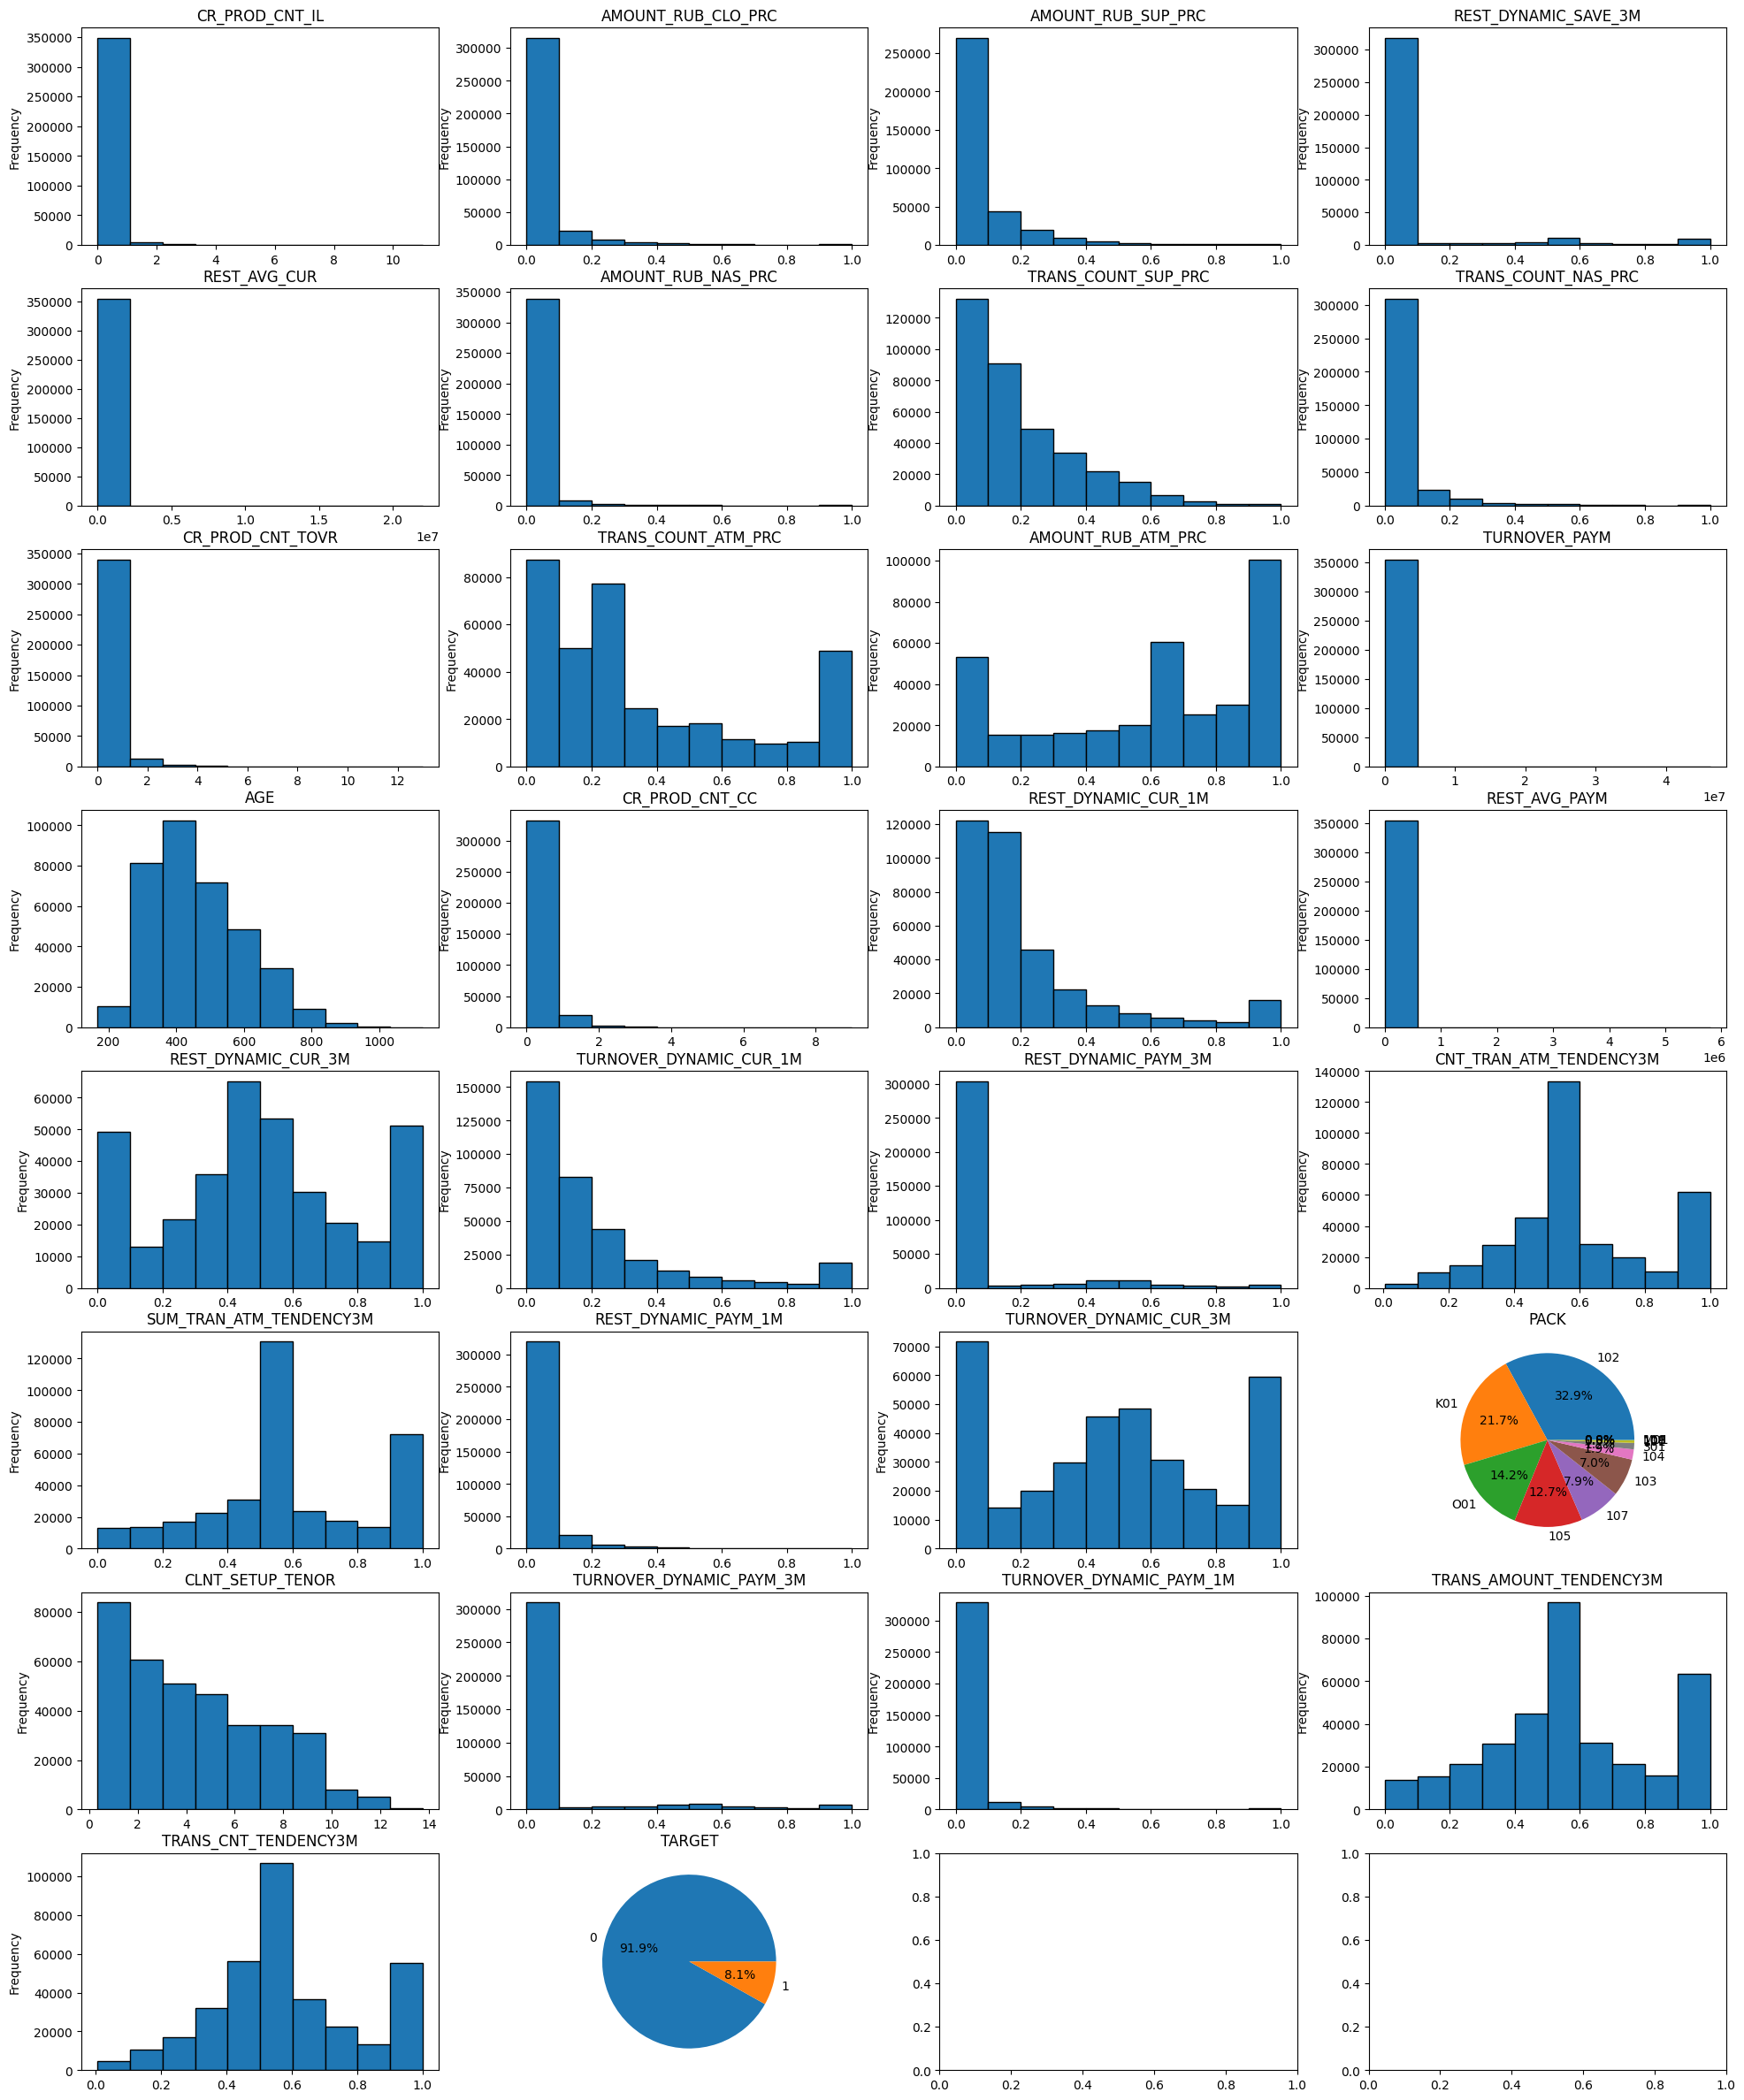

In [16]:
fig, axes = plt.subplots(8, 4, figsize=(24, 30))
for ax, col in zip(axes.flatten(), train_new.drop('ID', axis=1).columns):
    ax.set_title(col)
    if col == 'PACK' or col == 'TARGET':
        ax.pie(train_new[col].value_counts(), autopct="%1.1f%%", labels=train_new[col].value_counts().index)
    else:
        train_new[col].plot(kind="hist", ec="black", ax=ax)


Посмотрим распределение `TARGET`

In [17]:
train_new.TARGET.value_counts()

,count
TARGET,
0,326265
1,28925


## Разбиваем тренировочную выборку на тренировочную и валидационную

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_new.drop(['TARGET', 'ID'],axis=1),
                                                    train_new['TARGET'],
                                                    test_size=0.2,
                                                    random_state=21,
                                                    stratify=train_new['TARGET'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(284152, 29)
(71038, 29)
(284152,)
(71038,)


Кодирование категориального признака

После onehotrncoder - можно удалить один из векторов здесь возмем `PACK_108`

In [19]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded = encoder.fit(X_train[['PACK']])

X_train_ohe = pd.DataFrame(encoder.transform(X_train[['PACK']]), columns=encoded.get_feature_names_out())
X_train = pd.concat([X_train.reset_index(), X_train_ohe.reset_index()], axis=1).drop(['index'], axis=1)
X_train.drop(['PACK', 'PACK_108'], axis=1, inplace=True)

X_test_ohe = pd.DataFrame(encoder.transform(X_test[['PACK']]), columns=encoded.get_feature_names_out())
X_test = pd.concat([X_test.reset_index(), X_test_ohe.reset_index()], axis=1).drop(['index'], axis=1)
X_test.drop(['PACK', 'PACK_108'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Нормализуем все данные, кроме onehotencoder

In [20]:
scl = StandardScaler()
scl.fit(X_train.iloc[:,:-11])

X_train = pd.concat([pd.DataFrame(scl.transform(X_train.iloc[:,:-11]), columns=scl.get_feature_names_out()),
                     X_train.iloc[:,-11:]], axis=1)

X_test = pd.concat([pd.DataFrame(scl.transform(X_test.iloc[:,:-11]), columns=scl.get_feature_names_out()),
                    X_test.iloc[:,-11:]], axis=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(284152, 39)
(71038, 39)
(284152,)
(71038,)


посмотрим матрицу корреляции

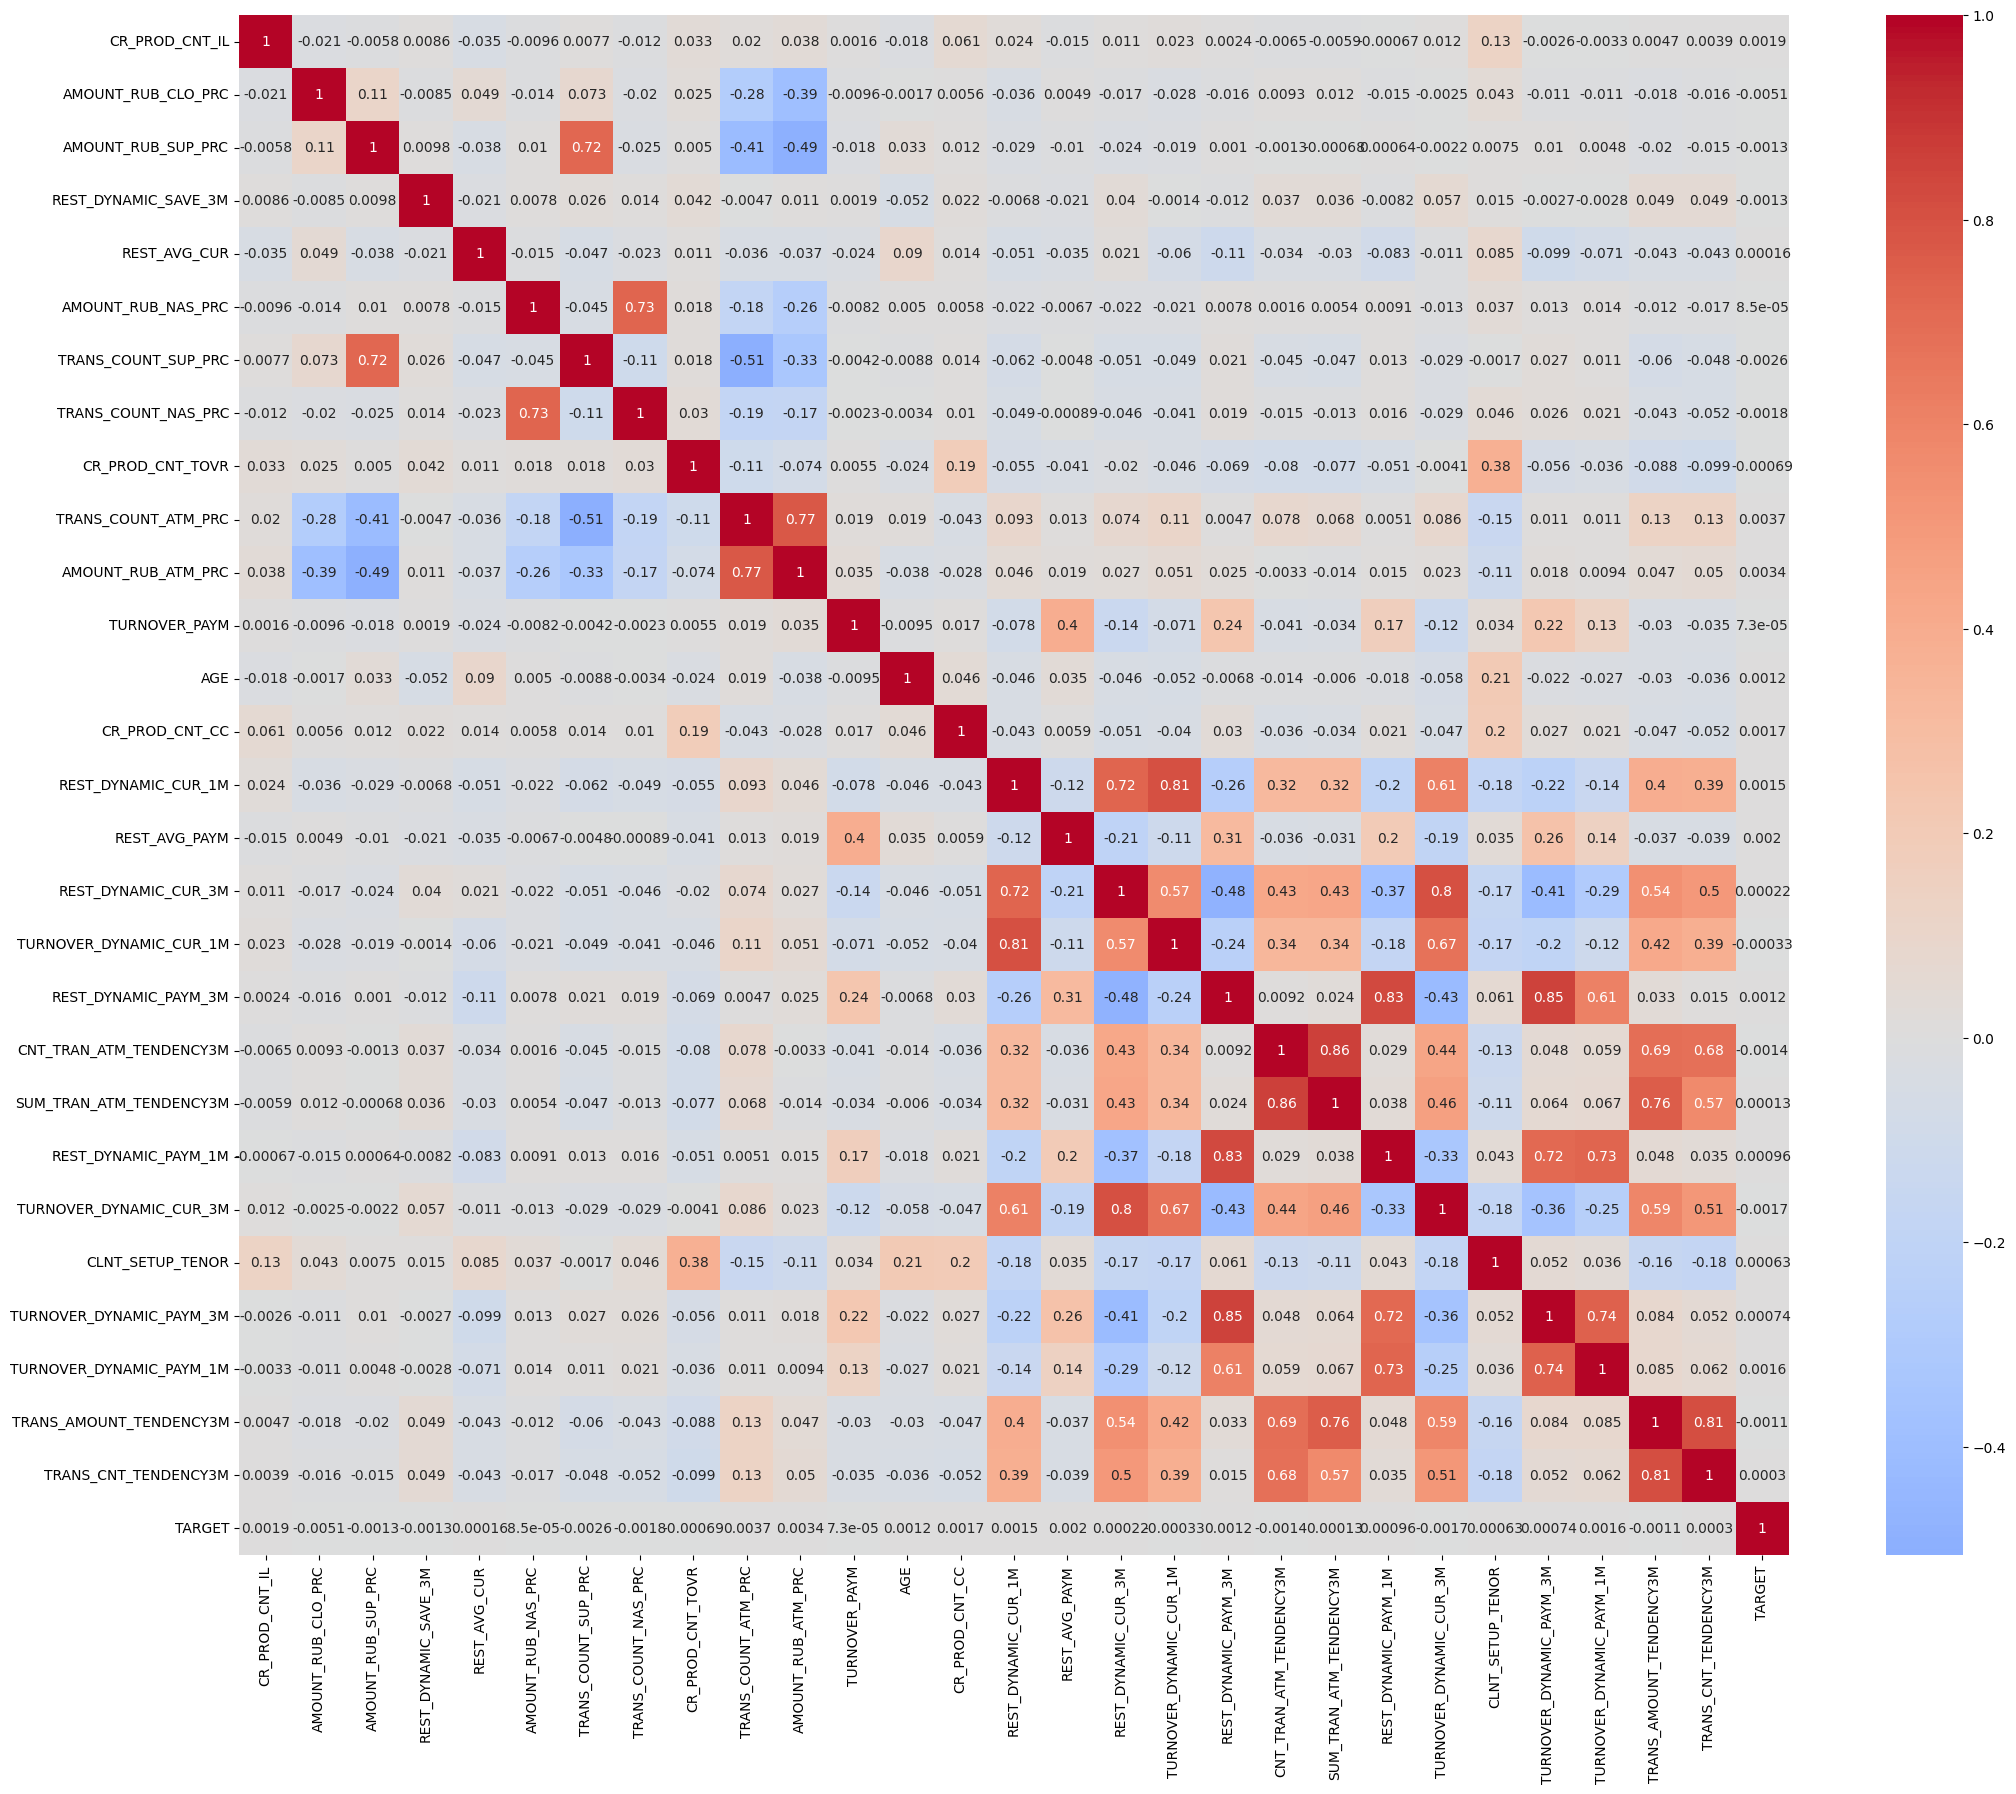

In [22]:
sns.heatmap(data=pd.concat([X_train.iloc[:,:-11], y_train], axis=1).corr(),
            annot=True,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(25,20))[1]);

Как видим некоторые признаки коррелируют, что может повлиять на работу некоторых алгоритмов. Пока не будем их трогать

# Обучение моделей

## 1. Наивный классификатор.
дадим самый популярный класс - 0

In [23]:
y_pred = y_test.apply(lambda x: 0)
naive_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Classifier Accuracy: {naive_accuracy:.3f}")

Naive Classifier Accuracy: 0.919


In [24]:
naive_auc = roc_auc_score(y_test, y_pred)
print(f"Naive Classifier AUC: {naive_auc}")

Naive Classifier AUC: 0.5


## 2. Случайный лес

In [25]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [200],
    'max_depth': [20, 25],
    'min_samples_split': [10],
    'min_samples_leaf': [4, 3]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='roc_auc', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.7min
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.7min
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time= 2.7min
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time= 2.8min
[CV] END criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.9min
[CV] END criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 2.9min
[CV] END criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time= 2.9min
[CV] END criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time= 2.9

In [26]:
rf_params = grid_search.best_params_

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200)

In [27]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"Random Forest Classifier AUC: {rf_auc:.4f}")

Random Forest Classifier AUC: 0.8357


In [28]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.9189


## 3. MLP из Sklearn

In [29]:
mlp = MLPClassifier(solver='adam',
                    alpha=0.04,
                    learning_rate_init=0.001,
                    random_state=21,
                    hidden_layer_sizes=(128,128,32),
                    n_iter_no_change=3,
                    verbose=True)

mlp.fit(X_train, y_train)

mlp_sklearn_auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
print(f"MLP Classifier AUC: {mlp_sklearn_auc:.4f}")

mlp_sklearn_accuracy = mlp.score(X_test, y_test)
print(f"MLP sklearn accuracy: {mlp_sklearn_accuracy:.4f}")

Iteration 1, loss = 0.27175608
Iteration 2, loss = 0.24972068
Iteration 3, loss = 0.24342589
Iteration 4, loss = 0.24006178
Iteration 5, loss = 0.23822512
Iteration 6, loss = 0.23673915
Iteration 7, loss = 0.23577188
Iteration 8, loss = 0.23489458
Iteration 9, loss = 0.23451845
Iteration 10, loss = 0.23368425
Iteration 11, loss = 0.23334598
Iteration 12, loss = 0.23288480
Iteration 13, loss = 0.23251433
Iteration 14, loss = 0.23229095
Iteration 15, loss = 0.23202301
Iteration 16, loss = 0.23193003
Iteration 17, loss = 0.23159764
Iteration 18, loss = 0.23130926
Iteration 19, loss = 0.23150831
Iteration 20, loss = 0.23141560
Iteration 21, loss = 0.23081979
Iteration 22, loss = 0.23103952
Iteration 23, loss = 0.23074528
Iteration 24, loss = 0.23073030
Iteration 25, loss = 0.23075383
Training loss did not improve more than tol=0.000100 for 3 consecutive epochs. Stopping.
MLP Classifier AUC: 0.8148
MLP sklearn accuracy: 0.9188


## 4. Keras

In [33]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.AUC()])

In [35]:
model.fit(X_train,
          y_train,
          epochs=20,
          batch_size=32,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - auc_1: 0.7021 - loss: 0.2665 - val_auc_1: 0.7816 - val_loss: 0.2420
Epoch 2/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - auc_1: 0.7825 - loss: 0.2396 - val_auc_1: 0.7911 - val_loss: 0.2400
Epoch 3/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - auc_1: 0.7950 - loss: 0.2375 - val_auc_1: 0.7990 - val_loss: 0.2365
Epoch 4/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - auc_1: 0.8064 - loss: 0.2329 - val_auc_1: 0.8071 - val_loss: 0.2334
Epoch 5/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - auc_1: 0.8093 - loss: 0.2315 - val_auc_1: 0.8060 - val_loss: 0.2341
Epoch 6/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - auc_1: 0.8136 - loss: 0.2302 - val_auc_1: 0.8080 - val_loss: 0.2333
Epoch 7/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - auc_1: 0.8143 - loss: 0.2306 - val_auc_1: 0.8097 - val_loss: 0.2322
Epoch 8/20
8880/8880 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - auc_1: 0.8178 - loss: 0.2303 - val_auc_1: 0.8143 - val_loss: 0.2321


In [75]:
_, mlp_keras_auc = model.evaluate(X_test, y_test, verbose=0)
print('Auc: %.4f' % mlp_keras_auc)

Auc: 0.8183


# 6. Numpy

In [46]:
# Инициализируем архитектуру
NN_ARCHITECTURE = [
    {"input_dim": 39, "output_dim": 128, "activation": "relu"},
    {"input_dim": 128, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 1, "activation": "sigmoid"},
]

In [47]:
def init_layers(nn_architecture, seed = 99):
    # устанавлицваем зерно случайности
    np.random.seed(seed)
    # количество слоев нейросети
    number_of_layers = len(nn_architecture)

    params_values = {}

    # проходим по всем слоя нейрсети
    for idx, layer in enumerate(nn_architecture):
        # начинаем не с нуля а с одного
        layer_idx = idx + 1

        # получаем количество нейронов во входном и выходном слое
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]

        # создаем начальные веса для нейронов
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1

    return params_values

In [48]:
# Зададим две функции активации и их рпоизводные
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [49]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    # расчет входного значения для функции активации
    Z_curr = np.dot(W_curr, A_prev) + b_curr

    # выбор функции активации
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')

    # возврат рассчитанной активации A и промежуточной матрицы Z
    return activation_func(Z_curr), Z_curr


def full_forward_propagation(X, params_values, nn_architecture):
    # создание временной памяти для хранения информации, необходимой для backward step
    memory = {}
    # Вектор X — активация слоя 0
    A_curr = X

    # итерация по все слоям
    for idx, layer in enumerate(nn_architecture):
        # начинаем со слоя 1
        layer_idx = idx + 1
        # переносим активацию с прошлой
        A_prev = A_curr

        # извлечение функции активации для текущего слоя
        activ_function_curr = layer["activation"]
        # извлечение W для текущего слоя
        W_curr = params_values["W" + str(layer_idx)]
        # извлечение b для текущего слоя
        b_curr = params_values["b" + str(layer_idx)]
        # расчет активации для текущего слоя
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)

        # сохранение расчетных значений в памяти
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr

    # возврат вектора прогнозирования и словаря, содержащего промежуточные значения
    return A_curr, memory

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-49-711de77e1a5b>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if activation is "relu":
<ipython-input-49-711de77e1a5b>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif activation is "sigmoid":


In [50]:
def get_cost_value(Y_hat, Y):
    # количество примеров
    m = Y_hat.shape[1]
    # расчет стоимости
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)


# вспомогательная функция, преобразующая вероятность в класс
def convert_prob_into_class(probs):
    treshold = 0.5
    probs_ = np.copy(probs)
    probs_[probs_ > treshold] = 1
    probs_[probs_ <= treshold] = 0
    return probs_

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    # return (Y_hat_ == Y).all(axis=0).mean()
    return roc_auc_score(Y_hat_[0], Y[0])

In [51]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    # количество примеров
    m = A_prev.shape[1]

    # выбор функции активации
    if activation is "relu":
        backward_activation_func = relu_backward
    elif activation is "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')

    # расчет производной функции активации
    dZ_curr = backward_activation_func(dA_curr, Z_curr)

    # производная матрицы W
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    # производная вектора b
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    # производная матрицы A_prev
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}

    # количество примеров
    m = Y.shape[1]
    # хак, обеспечивающий одинаковую форму вектора предсказания и вектора меток
    Y = Y.reshape(Y_hat.shape)

    # запуск алгоритма градиентного спуска
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));

    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):

        layer_idx_curr = layer_idx_prev + 1
        # извлечение функции активации для текущего слоя
        activ_function_curr = layer["activation"]

        dA_curr = dA_prev

        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]

        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]

        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)

        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr

    return grads_values

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-51-7afdce51c098>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if activation is "relu":
<ipython-input-51-7afdce51c098>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif activation is "sigmoid":


In [52]:
def update(params_values, grads_values, nn_architecture, learning_rate):

    for layer_idx, layer in enumerate(nn_architecture, 1):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

In [53]:
def train(X, Y, nn_architecture, epochs, learning_rate, verbose=False, callback=None):
    # инициирование параметров нейронной сети
    params_values = init_layers(nn_architecture, 2)
    # инициирование списков хранения истории
    # метрик, рассчитываемых в процессе обучения
    cost_history = []
    accuracy_history = []

    # выполнение вычислений для последующих итераций
    for i in range(epochs):

        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)

        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)


        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)

        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        print("Эпоха: {:02} - cost: {:.5f} - roc_auc: {:.5f}".format(i, cost, accuracy))

    return params_values

In [57]:
params_values = train(np.transpose(X_train.to_numpy()),
                      np.transpose(y_train.to_numpy().reshape((y_train.shape[0], 1))),
                      nn_architecture=NN_ARCHITECTURE,
                      epochs=7,
                      learning_rate=0.02)


Эпоха: 00 - cost: 0.75138 - roc_auc: 0.48656
Эпоха: 01 - cost: 0.73575 - roc_auc: 0.48782
Эпоха: 02 - cost: 0.72090 - roc_auc: 0.49034
Эпоха: 03 - cost: 0.70673 - roc_auc: 0.49417
Эпоха: 04 - cost: 0.69319 - roc_auc: 0.49820
Эпоха: 05 - cost: 0.68021 - roc_auc: 0.50134
Эпоха: 06 - cost: 0.66773 - roc_auc: 0.50346


In [ ]:
type(params_values)

dict

In [ ]:
params_values.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'])

In [59]:
Y_test_hat, _ = full_forward_propagation(np.transpose(X_test), params_values, NN_ARCHITECTURE)

In [60]:
mlp_np_auc = get_accuracy_value(Y_test_hat, np.transpose(y_test.to_numpy().reshape((y_test.shape[0], 1))))
print("Auc: {:.4f}".format(mlp_np_auc))

Auc: 0.5032


# Выводим таблицу с результатами для каждой модели

In [63]:
results = pd.DataFrame({
    'Library': ['Naive', 'Random Forest', 'Scikit-learn MLP', 'Keras MLP', 'TensorFlow MLP', 'NumPy MLP'],
    'AUC': [naive_auc, rf_auc, mlp_sklearn_auc, mlp_keras_auc, mlp_keras_auc, mlp_np_auc]
})
results

,Library,AUC
0,Naive,0.500000
1,Random Forest,0.835740
2,Scikit-learn MLP,0.814777
3,Keras MLP,0.818316
4,TensorFlow MLP,0.818316
5,NumPy MLP,0.503232


Лучший результат показал алгоритм RandomForest. Поэтому на нем сделам предсказание на тестовой выборке.


In [66]:
# Удалим из таблицы для тестов ID
for_test = test_new.drop(['ID'], axis=1)
for_test

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_SAVE_3M,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,TRANS_COUNT_ATM_PRC,...,CNT_TRAN_ATM_TENDENCY3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,PACK,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M
0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,1.000000,...,0.428571,0.221448,0.133121,0.000000,105,2.488176,0.201748,0.069329,0.221448,0.428571
1,0,0.059381,0.000333,0.0,79727.887833,0.002744,0.020408,0.224490,1,0.040816,...,0.500000,0.591837,0.000000,0.312356,102,3.006883,0.000000,0.000000,0.302266,0.653061
2,0,0.070430,0.077876,0.0,49743.851617,0.009666,0.157143,0.014286,0,0.314286,...,0.727273,0.646209,0.000000,0.653544,102,2.044636,0.000000,0.000000,0.657374,0.700000
3,0,0.000000,0.027147,0.0,32360.786350,0.000000,0.146728,0.000000,0,0.250000,...,0.600000,0.600000,0.000000,0.472585,102,1.082152,0.000000,0.000000,0.552171,0.560000
4,0,0.180961,0.270853,0.0,147710.265650,0.007990,0.304965,0.007092,0,0.000000,...,0.600000,0.600000,0.000000,0.378886,104,7.727424,0.000000,0.000000,0.398445,0.468085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88793,0,0.000000,0.000000,0.0,28831.108617,0.000000,0.000000,0.000000,1,1.000000,...,0.500000,0.218081,0.000000,0.258624,O01,10.254313,0.000000,0.000000,0.218081,0.500000
88794,1,1.000000,0.000000,0.0,563197.143400,0.000000,0.000000,0.000000,0,0.000000,...,0.600000,0.600000,0.000000,0.001314,K01,3.023130,0.000000,0.000000,0.552171,0.560000
88795,0,0.047768,0.241843,0.0,5206.774000,0.090111,0.233933,0.053985,0,0.131105,...,0.686275,0.674127,0.133118,0.000000,O01,4.098399,0.536266,0.162707,0.611726,0.588689
88796,0,0.035166,0.037590,0.0,220355.154967,0.002336,0.096257,0.064171,1,0.363636,...,0.514706,0.356364,0.000000,0.369806,104,6.012259,0.000000,0.000000,0.394663,0.481283


In [67]:
# Преобразум категориальный признак

X_ohe = pd.DataFrame(encoder.transform(for_test[['PACK']]), columns=encoded.get_feature_names_out())
X = pd.concat([for_test.reset_index(), X_ohe.reset_index()], axis=1).drop(['index'], axis=1)
X.drop(['PACK', 'PACK_108'], axis=1, inplace=True)
X

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_SAVE_3M,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,TRANS_COUNT_ATM_PRC,...,PACK_102,PACK_103,PACK_104,PACK_105,PACK_107,PACK_109,PACK_301,PACK_K01,PACK_M01,PACK_O01
0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.059381,0.000333,0.0,79727.887833,0.002744,0.020408,0.224490,1,0.040816,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.070430,0.077876,0.0,49743.851617,0.009666,0.157143,0.014286,0,0.314286,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.027147,0.0,32360.786350,0.000000,0.146728,0.000000,0,0.250000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.180961,0.270853,0.0,147710.265650,0.007990,0.304965,0.007092,0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88793,0,0.000000,0.000000,0.0,28831.108617,0.000000,0.000000,0.000000,1,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88794,1,1.000000,0.000000,0.0,563197.143400,0.000000,0.000000,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88795,0,0.047768,0.241843,0.0,5206.774000,0.090111,0.233933,0.053985,0,0.131105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88796,0,0.035166,0.037590,0.0,220355.154967,0.002336,0.096257,0.064171,1,0.363636,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Нормализуем данные тестовой таблицы
X = pd.concat([pd.DataFrame(scl.transform(X.iloc[:,:-11]), columns=scl.get_feature_names_out()),
                    X.iloc[:,-11:]], axis=1)
X

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_SAVE_3M,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,TRANS_COUNT_ATM_PRC,...,PACK_102,PACK_103,PACK_104,PACK_105,PACK_107,PACK_109,PACK_301,PACK_K01,PACK_M01,PACK_O01
0,-0.244462,-0.379933,-0.583152,-0.312779,-0.360265,-0.248739,-1.004695,-0.409053,-0.526264,1.969115,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.244462,0.192887,-0.580690,-0.312779,0.073578,-0.216855,-0.894641,1.605779,1.172271,-0.970040,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.244462,0.299476,-0.008190,-0.312779,-0.089582,-0.136422,-0.157275,-0.280837,-0.526264,-0.132068,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.244462,-0.379933,-0.382727,-0.312779,-0.184173,-0.248739,-0.213440,-0.409053,-0.526264,-0.329054,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.244462,1.365724,1.416565,-0.312779,0.443507,-0.155894,0.639880,-0.345400,-0.526264,-1.095111,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88793,-0.244462,-0.379933,-0.583152,-0.312779,-0.203380,-0.248739,-1.004695,-0.409053,1.172271,1.969115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88794,2.082030,9.266658,-0.583152,-0.312779,2.704398,-0.248739,-1.004695,-0.409053,-0.526264,-1.095111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88795,-0.244462,0.080869,1.202380,-0.312779,-0.331932,0.798367,0.256831,0.075467,-0.526264,-0.693374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88796,-0.244462,-0.040699,-0.305628,-0.312779,0.838807,-0.221593,-0.485614,0.166893,1.172271,0.019153,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Предскажем данные на случайном лесе, потому что это лучшая модель
y_pred = rf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
result = pd.DataFrame(test_new['ID'], columns=['ID'])
result['TARGET'] = y_pred
result

,ID,TARGET
0,400980,0
1,525062,0
2,280316,0
3,496066,0
4,375031,0
...,...,...
88793,175305,0
88794,275016,0
88795,277398,0
88796,469164,0


In [73]:
result.TARGET.value_counts()

,count
TARGET,
0,88628
1,170


In [74]:
# СОхраним данные
result.to_csv('predictions.csv')